# Pretty vs Ugly Plots

### Answering Questions:

#### 1. How do the vaccination totals between age groups compare?
#### 2. How have the average vaccination totals changed over time? 

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

## Load the data

Data was precleaned and transformed for this notebook

In [2]:
# Load the data freshly from the file
df_cleaned = pd.read_csv('Vaccination_Data.csv')

# Convert Date columns
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Month N Year'] = pd.to_datetime(df_cleaned['Month N Year'], errors='coerce')

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4454 non-null   datetime64[ns]
 1   Month N Year     4454 non-null   datetime64[ns]
 2   TotalVaccinated  4454 non-null   int64         
 3   0-14             4454 non-null   int64         
 4   15-24            4454 non-null   int64         
 5   25-34            4454 non-null   int64         
 6   35-44            4454 non-null   int64         
 7   45-54            4454 non-null   int64         
 8   55-64            4454 non-null   int64         
 9   65-74            4454 non-null   int64         
 10  75+              4454 non-null   int64         
 11  Undisclosed      4454 non-null   int64         
dtypes: datetime64[ns](2), int64(10)
memory usage: 417.7 KB


### Pretty Plot

We will use sub plots to answer both the questions in 2 plots joined together

In [3]:
#All the age groups columns with all rows
#Total undisclosed age group count is 4K+
#This will not show up to the scale in these graphs
#So we will exclude undisclosed AgeGroup
df_ages_grps = df_cleaned.iloc[:, 3:11]
df_ages_grps

,0-14,15-24,25-34,35-44,45-54,55-64,65-74,75+
0,0,0,0,0,0,0,0,0
1,202,1688,4459,3327,2877,3278,2728,1933
2,508,2719,3037,4053,3950,3590,2265,1533
3,346,2120,2185,2375,2812,2747,2051,1067
4,564,2701,3821,3707,3557,4354,2719,1473
...,...,...,...,...,...,...,...,...
4449,866,1905,1484,1604,2425,3519,3388,2411
4450,375,898,1752,1605,1446,2037,2181,2192
4451,662,1469,1710,2021,2362,3378,4270,4636
4452,687,1827,1996,1939,2093,2754,2466,2179


### Prepare data for 1st Question

In [4]:
millions = 1000000

In [5]:
#Counts in Millions
summed_ages = np.round(df_ages_grps.sum() / millions, 2)
# Sort by top to bottom
summed_ages.sort_values(ascending=False, inplace=True)

summed_ages

55-64    12.57
45-54    11.72
65-74    11.52
35-44    11.20
25-34    10.79
15-24     9.52
75+       8.82
0-14      2.51
dtype: float64

### Prepare Data for 2nd Question

In [6]:
# Melt the cleaned datafrom from wide format to long format to be used as categorical data
value_cols = ['75+', '65-74', '55-64', '45-54', '35-44', '25-34', '15-24', '0-14']

# Melt the dataframe
df_melted = pd.melt(
    df_cleaned,
    id_vars=['Month N Year'],
    value_vars=value_cols,
    var_name='Age Group',
    value_name='Total'
)

df_melted.head()

,Month N Year,Age Group,Total
0,2021-06-01,75+,0
1,2021-06-01,75+,1933
2,2021-06-01,75+,1533
3,2021-06-01,75+,1067
4,2021-06-01,75+,1473


In [7]:
# After converting long format, take a groupby on Date and get sum
df_total_by_date_age = df_melted.groupby(['Month N Year', 'Age Group'])['Total'].sum().reset_index()
# Convert to millions
df_total_by_date_age['Total'] = np.round(df_total_by_date_age['Total'] / millions, 2)

df_total_by_date_age.head()

,Month N Year,Age Group,Total
0,2021-06-01,0-14,0.11
1,2021-06-01,15-24,0.64
2,2021-06-01,25-34,0.78
3,2021-06-01,35-44,0.83
4,2021-06-01,45-54,0.90


## Pretty Plots

In [8]:
# Create a colormap (using shades of blue)
colors = sns.color_palette('Blues_r', 8)
# Define a custom dark color palette
dark_palette = sns.color_palette(["#006400", "#00008B", "#8B0000", "#4B0082", 
                                  "#FF8C00", "#8B4513", "#008B8B", "#8B008B"])

sizes = [50, 100, 150, 200, 250, 300, 350, 400]

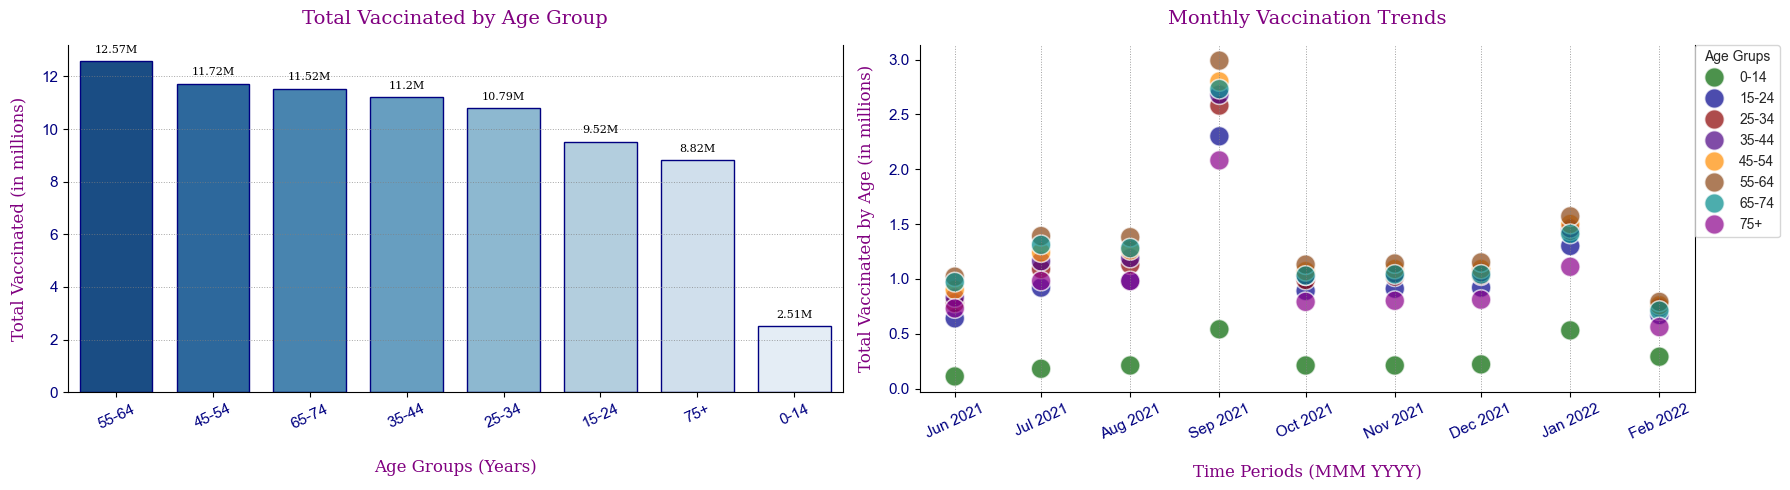

In [9]:
#Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(18,5))
#Set style
sns.set_style('whitegrid')

#=============================================
#Plot the 1st preety plot to answer Question 1
#=============================================
bp = sns.barplot(
    x=summed_ages.index,
    y=summed_ages.values,
    edgecolor='navy',    
    width=0.75,
    palette=colors,
    hue=summed_ages.index,
    ax=axes[0]
)

axes[0].legend([],[], frameon=False)

# Customize Grid
axes[0].grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, color='gray', alpha=0.7)

# Remove unnecessary spines
sns.despine(ax=axes[0], left=False, bottom=False, right=False)

# Add and Customize Title
axes[0].set_title("Total Vaccinated by Age Group",
          fontfamily='serif', fontsize=14, color='purple', pad=15)
axes[0].set_xlabel('Age Groups (Years)', fontfamily='serif', fontsize=12, color='purple', labelpad=20)
axes[0].set_ylabel("Total Vaccinated (in millions)", fontfamily='serif', fontsize=12, color='purple', labelpad=10)

# Customize tick labels
axes[0].tick_params(axis='x', labelsize=11, labelcolor='navy', rotation=25)
axes[0].tick_params(axis='y', labelsize=11, labelcolor='navy')

# Add values on the edges of the bars
for i, bar in enumerate(bp.patches):
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,  # X position of the text (center of the bar)
        bar.get_height() + 0.25,            # Y position of the text (height of the bar)
        f'{bar.get_height()}M',             # The text (formatted as integer with commas)
        ha='center', va='bottom',           # Text alignment: horizontal 'center', vertical 'bottom'
        fontsize=8, color='black',          # Text font properties
        fontfamily='serif'  
    )

#===============================================
#Plot the 2nd Pretty Graph to answer Question 2
#===============================================
sns.scatterplot(data=df_total_by_date_age, 
                x='Month N Year', 
                y='Total', 
                hue='Age Group',
                marker='o', 
                palette=dark_palette,
                legend=True,
                s=200,
                alpha=0.70,
                ax=axes[1])

# Customize Grid
axes[1].grid(True, which='major', axis='x', linestyle=':', linewidth=0.7, color='gray', alpha=0.75)

# Customize Legend
axes[1].legend(title='Age Grups', bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0)

# Remove unnecessary spines
sns.despine(ax=axes[1], left=False, bottom=False, right=False)

# Add and Customize Title
axes[1].set_title('Monthly Vaccination Trends',
          fontfamily='serif', fontsize=14, color='purple', pad=15)

# Set and customize x and y axis labels
axes[1].set_xlabel('Time Periods (MMM YYYY)', fontfamily='serif', fontsize=12, color='purple', labelpad=15)
axes[1].set_ylabel("Total Vaccinated by Age (in millions)", fontfamily='serif', fontsize=12, color='purple', labelpad=10)

# Customize DateFormat on X Axis to show Month name and Year
axes[1].xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Customize x and y ticks labels
axes[1].tick_params(axis='x', labelsize=11, labelcolor='navy', rotation=25)
axes[1].tick_params(axis='y', labelsize=11, labelcolor='navy')

# Apply tight_layout
plt.tight_layout()
#Show the plot
plt.show()


## Ugly Plots

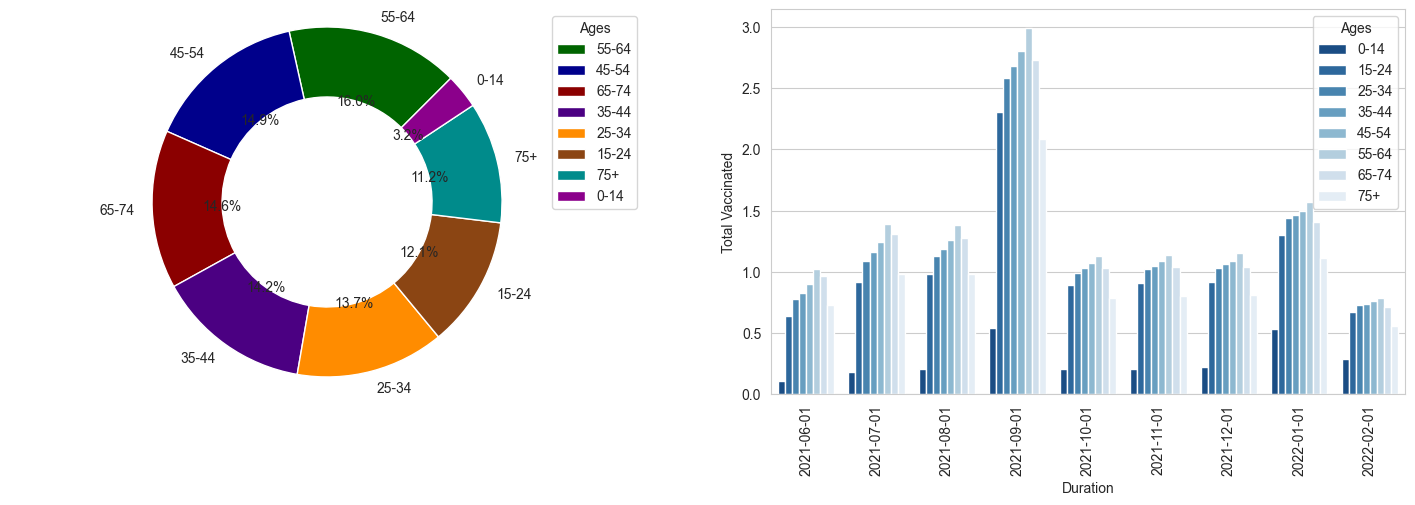

In [10]:
#Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(18,5))
#Set style
sns.set_style('whitegrid')

#======================
# 1st Ugly Plot for Q1
#======================
axes[0].pie(
    summed_ages,
    labels=summed_ages.index,
    autopct='%1.1f%%',
    colors=dark_palette,
    startangle=45,
    wedgeprops={'width':0.4}
)

axes[0].legend(title='Ages', loc='best')
axes[0].axis('equal')

#======================
# 2nd Ugly Plot for Q2
#======================
sns.barplot(data=df_total_by_date_age,
            x='Month N Year',
            y='Total',
            hue='Age Group',
            ax=axes[1],
            palette='Blues_r'
)

axes[1].legend(title='Ages', loc='upper right')
# Set labels for the second plot
axes[1].set_xlabel('Duration')
axes[1].set_ylabel("Total Vaccinated")
axes[1].tick_params(axis='x', rotation=90)

#plt.tight_layout()
plt.show()

### This is how it looked in my local (Little modified:- Age Groups are not there in scatter plot in this image):

![This is how they look in my local](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F9363237%2F2b6d8cc7d548804108c0f0290437c13a%2FCapture.JPG?generation=1727478132192335&alt=media)